# Laboratorio 2
- Pablo Cortés - 20.600.436-3
- Camilo Bravo - 21.048.333-0
- Rubén Rojas - 20.441.846-2
---

## Motivación

Este laboratorio busca proporcionar una comprensión práctica de la generación, combinación y análisis de señales senoidales y cuadradas, así como de la manipulación de audio digital. A través de ejercicios prácticos, se desarrollarán habilidades técnicas en Python que permitirán abordar problemas complejos en el ámbito de la ciencia de datos, fomentando un pensamiento crítico sobre la representación y análisis de datos.

## Señal senoidal
---

### Crear señal en un arreglo

En matemática se denomina **[sinusoide](https://es.wikipedia.org/wiki/Sinusoide)** o **senoide** a la curva que representa gráficamente a la función **seno** y también a dicha función en sí. Es una curva que describe una oscilación repetitiva y suave.

Su forma más básica en función del tiempo (t) es:

$$y(t)=A\,\text{sen}(\omega t+\varphi)$$

donde

* $A$ es la amplitud de la oscilación.
* $\omega$ es la velocidad angular, $\omega = 2\pi f$.
* $f$ es la frecuencia de oscilación.
* $\varphi$ es la fase inicial.

A continuación se crea una señal senoidal en Python, usando *comprehension list* para generar y almacenar los puntos de la señal, y considerando parámetros como la **amplitud**, **frecuencia** y **frecuencia de muestreo** de la señal.

Se asume que la **fase inicial** de la señal es 0 y la duración de la señal es 1 segundo.

In [ ]:
import math
import matplotlib.pyplot as plt


def generar_senal_senoidal(A: float, f: float, fs: int
                           )-> tuple[list[float], list[float]]:
    """
    Genera una señal senoidal y almacena sus valores en una lista.

    Args:
        A: Amplitud de la señal.
        f: Frecuencia de la señal.
        fs: Frecuencia de muestreo de la señal.

    Returns:
        Una 2-tupla con dos listas, la primera con los valores de tiempo y la
        segunda con los valores de la señal senoidal.
    """
    t = [i / fs for i in range(fs + 1)]
    y = [A * math.sin(2 * math.pi * f * ti) for ti in t]

    return (t, y)

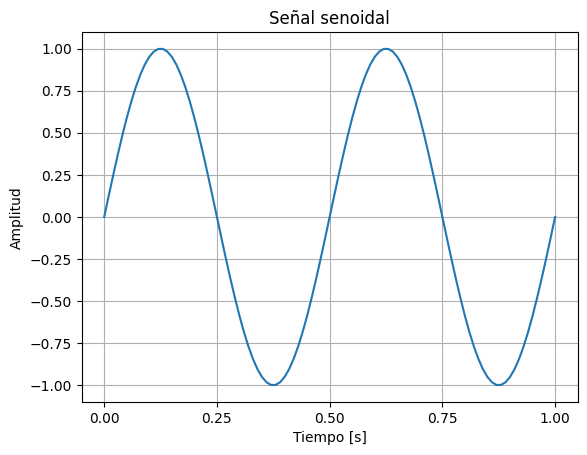

In [ ]:
A = 1
f = 2
fs  = 100

t, y_sen = generar_senal_senoidal(A, f, fs)

plt.plot(t, y_sen)
plt.xlabel('Tiempo [s]')
plt.xticks([i / 100 for i in range(0, 101, 25)])
plt.ylabel('Amplitud')
plt.title('Señal senoidal')
plt.grid()
plt.show()

### Suma de señales

Para combinar dos señales senoidales, lo más común es hacer una **suma** de las dos señales en cada instante de tiempo. Cada señal puede ser representada como una función del tiempo, y cuando se combinan, simplemente se suman sus valores en cada punto del tiempo correspondiente.

$$y_f (t) = y_1 (t) + y_2 (t)$$

A continuación se crean dos señales senoidales para luego ser combinadas, generando una nueva señal senoidal. La **amplitud** y la **frecuencia** de la señal pueden ser distintas, sin embargo la **frecuencia de muestreo** debe ser la misma para ambas.

De nuevo, se asume una **fase inicial** igual a 0 y una duración de 1 segundo.

In [ ]:
def combinar_senales_senoidales(senal_1: list[float], senal_2: list[float]
                                )-> list[float]:
    """
    Combina dos señales senoidales sumando sus valores.

    Args:
        senal_1: Lista con los valores de la primera señal.
        senal_2: Lista con los valores de la segunda señal.

    Returns:
        Lista con los valores de la señal resultante.
    """
    return [s1 + s2 for s1, s2 in zip(senal_1, senal_2)]

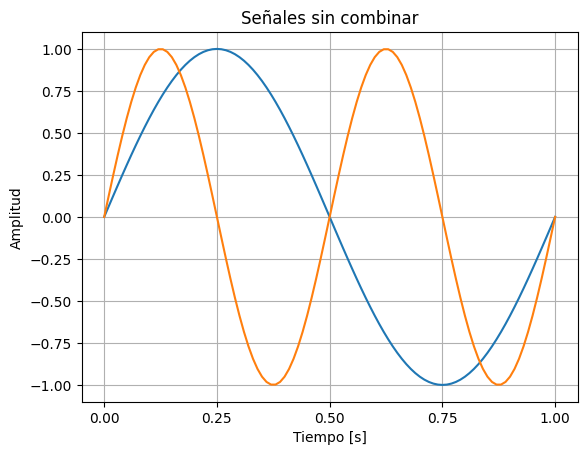

In [ ]:
fs = 100

A_1 = 1
f_1 = 1
t_1, y_1 = generar_senal_senoidal(A_1, f_1, fs)

A_2 = 1
f_2 = 2
t_2, y_2 = generar_senal_senoidal(A_2, f_2, fs)

plt.plot(t_1, y_1)
plt.plot(t_2, y_2)
plt.xlabel('Tiempo [s]')
plt.xticks([i / 100 for i in range(0,101, 25)])
plt.ylabel('Amplitud')
plt.title('Señales sin combinar')
plt.grid()
plt.show()

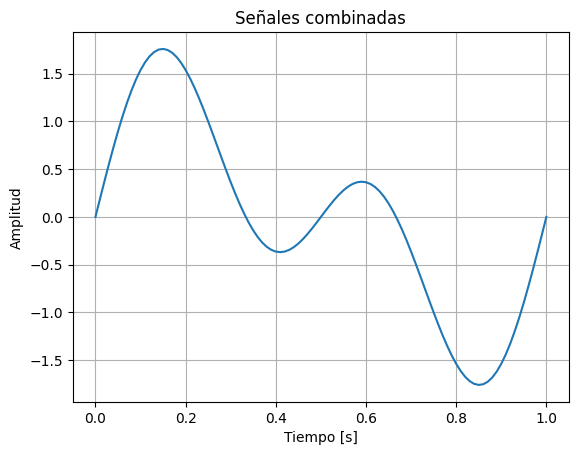

In [ ]:
y_comb = combinar_senales_senoidales(y_1, y_2)

plt.plot(t_1, y_comb)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señales combinadas')
plt.grid()
plt.show()

### Señal cuadrada

Las **[señales cuadradas](https://es.wikipedia.org/wiki/Onda_cuadrada)** son un tipo de señal periódica que alterna entre dos niveles de amplitud, caracterizadas por transiciones bruscas entre los valores alto y bajo. En los sistemas digitales, estas señales son fundamentales ya que representan los estados binarios "**alto**" (1) y "**bajo**" (0), utilizados para la transmisión y procesamiento de información.

$$y(t) = \begin{cases} A, & \text{si } A\,\text{sen}(\omega t) \geq 0 \\
-A, & \text{si } A\,{sen}(\omega t) < 0\end{cases}$$

A continuación se crea una señal cuadrada considerando parámetros como la **amplitud**, **frecuencia** y **frecuencia de muestreo** de la señal.

Se asume que la **fase inicial** es 0 y que la señal dura 1 segundo.

In [ ]:
def generar_señal_cuadrada(A: float, f: float, fs:int
                           ) -> tuple[list[float], list[float]]:
    """
    Genera una señal cuadrada y almacena sus valores en una lista.

    Args:
        A: Amplitud de la señal.
        f: Frecuencia de la señal.
        fs: Frecuencia de muestreo de la señal.

    Returns:
        Una 2-tupla con dos listas, la primera con los valores de tiempo y la
        segunda con los valores de la señal cuadrada.
    """
    t = [i / fs for i in range(fs + 1)]
    y = [A if A * math.sin(2 * math.pi * f * ti) >= 0 else -A for ti in t]

    return (t, y)

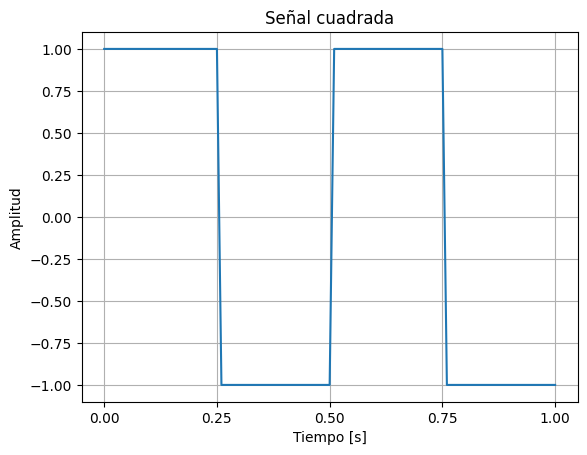

In [ ]:
A = 1
f = 2
fs = 100

t, y_cuad = generar_señal_cuadrada(A, f, fs)

plt.plot(t, y_cuad)
plt.xlabel('Tiempo [s]')
plt.xticks([i / 100 for i in range(0, 101, 25)])
plt.ylabel('Amplitud')
plt.title('Señal cuadrada')
plt.grid()
plt.show()

### Amplitud máxima

Para encontrar la amplitud máxima, se puede usar un enfoque de fuerza bruta

In [ ]:
# Máximo valor absoluto
amplitud_max = max(map(abs, y_comb))

print(f'La amplitud máxima es: {amplitud_max}')

La amplitud máxima es: 1.760073510670101


### Amplitud promedio

In [ ]:
# Promedio entre todas las muestras
amplitud_promedio = sum(map(abs, y_comb)) / len(y_comb)

print(f'La amplitud promedio es: {amplitud_promedio}')

La amplitud promedio es: 0.7875821206393718


### Encontrar raíces

In [ ]:
import numpy as np


def contar_raices(senal, tiempo):
    """
    Cuenta el número de raíces de una señal.

    Args:
        senal: Lista con los valores de la señal.
        tiempo: Lista con los valores del tiempo.

    Returns:
        Una 2-tupla con el número de raíces y una lista con los tiempos de las
        raíces.
    """
    cruces = np.where(np.diff(np.sign(senal)))[0]
    raices = [tiempo[int(cruce)] for cruce in cruces]
    return len(raices), raices

In [ ]:
print(contar_raices(y_sen, t))
print(contar_raices(y_cuad, t))
print(contar_raices(y_comb, t))

(4, [0.0, 0.25, 0.5, 0.75])
(3, [0.25, 0.5, 0.75])
(4, [0.0, 0.33, 0.5, 0.66])


## Audio
---

### Abrir un archivo mp3

**[pydub](https://github.com/jiaaro/pydub)** es una librería que permite manipular audio con una interfaz de alto nivel, simple y fácil de usar.

Al cargar un archivo de audio, pydub crea una instancia de *AudioSegment*, sin embargo es posible transformar este objeto a un array mediante el método `get_array_of_samples()`, para finalmente convertirlo en una lista.

In [ ]:
from pydub import AudioSegment

# Abre un archivo de audio y lo almacena en un objeto
audio = AudioSegment.from_mp3('sample.mp3')

# Reproduce el audio
audio

In [39]:
# Obtiene las muestras del audio y las almacena en una lista
samples = audio.get_array_of_samples().tolist()

# Primeros 100 valores
print(samples[:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


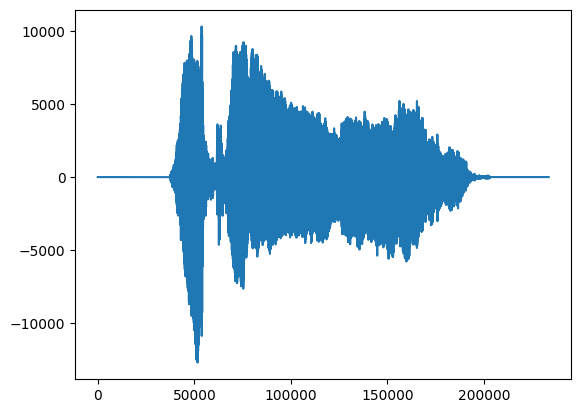

In [ ]:
# Gráfico de muestras del audio
plt.plot(samples)

### Recortar un clip de audio

pydub tiene soporte para operadores. Para recortar un clip de audio, simplemente hay que hacer *slicing* a una instancia de *AudioSegment*.

In [ ]:
def recortar_clip(ruta: str, inicio: int, fin: int) -> AudioSegment:
    """
    Recorta un clip de audio de un archivo mp3.

    Args:
        ruta: Ruta del archivo mp3.
        inicio: Tiempo de inicio del clip en milisegundos.
        fin: Tiempo de fin del clip en milisegundos.

    Returns:
        Una instancia de AudioSegment con el clip recortado.
    """
    audio = AudioSegment.from_mp3(ruta)
    return audio[inicio:fin]

In [ ]:
clip = recortar_clip('sample.mp3', 800, 1300)

# Exportar como mp3 para escuchar resultados
clip.export('clip.mp3', format='mp3')

clip

### Normalizar audio

La **[normalización de audio](https://es.wikipedia.org/wiki/Normalizaci%C3%B3n_de_audio)** es la aplicación de una cantidad constante de ganancia a una grabación de audio para llevar la amplitud de pico promedio a un nivel objetivo (la norma). Debido a que se aplica la misma cantidad de ganancia a todo el rango, la relación señal-ruido generalmente no cambia.

In [ ]:
# Normaliza un audio
audio.apply_gain(-audio.max_dBFS)

### Generar ruido

El **[ruido blanco](https://es.wikipedia.org/wiki/Ruido_blanco)** o **alteración blanca** es una señal aleatoria (proceso estocástico) que se caracteriza por el hecho de que sus valores de señal en dos tiempos diferentes no guardan correlación estadística. Como consecuencia de ello, su densidad espectral de potencia (PSD, sigla en inglés de power spectral density) es una constante, es decir, su gráfica es plana.1​ Esto significa que la señal contiene todas las frecuencias y todas ellas muestran la misma potencia. Igual fenómeno ocurre con la luz blanca, de allí la denominación.

In [ ]:
from pydub.generators import WhiteNoise


def anadir_ruido(audio: AudioSegment, db_ruido: int = -20) -> AudioSegment:
    """
    Anade ruido a un audio.

    Args:
        audio: Una instancia de AudioSegment.

    Returns:
        Una instancia de AudioSegment con ruido agregado.
    """
    ruido = WhiteNoise().to_audio_segment(duration=len(audio)) + db_ruido

    return audio.overlay(ruido)

In [ ]:
# Añadir ruido blanco al audio
audio_ruido = anadir_ruido(audio)

audio_ruido

## Conclusiones

Este laboratorio permitió reforzar habilidades en Python, enfocándose en la generación, combinación y análisis de señales senoidales y cuadradas, así como en la manipulación de audio digital. A través de ejercicios prácticos, se adquirieron competencias en el manejo de listas y el uso de bibliotecas para la visualización de datos. Sin embargo, se presentó la dificultad de repasar contenidos aprendidos hace tiempo, lo que complicó la asimilación de algunos conceptos. Estas habilidades son esenciales en ciencia de datos, ya que permiten un mejor procesamiento y análisis de datos, formando una base sólida para futuros desarrollos en el campo.

